In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Toss Decision Prediction

In [2]:
from sklearn.preprocessing import LabelBinarizer
bin_enc  = LabelBinarizer()
train_data = pd.read_csv("../Dataset/traindata.csv")
test_data = pd.read_csv("../Dataset/testdata.csv")
X_train  = train_data.drop(["TossDecision"],axis=1)
Y_train = bin_enc.fit_transform(train_data["TossDecision"]).ravel()
X_test  = test_data.drop(["TossDecision"],axis=1)
Y_test = bin_enc.fit_transform(test_data["TossDecision"]).ravel()


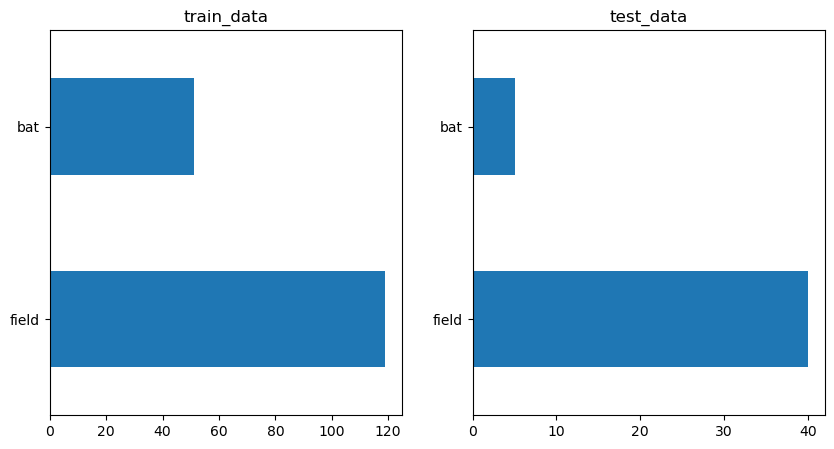

In [3]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
train_data["TossDecision"].value_counts().plot(kind="barh",ax=ax[0],title="train_data")
test_data["TossDecision"].value_counts().plot(kind="barh",ax=ax[1],title="test_data")
plt.show()
model = []
accur = []

Decission Tree


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
dtree = DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=105)
dtree_model = dtree.fit(X_train,Y_train)
ypred = dtree_model.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(Y_test,ypred)))
cm1 = (confusion_matrix(Y_test,ypred))
model.append("DecisionTree")
accur.append(accuracy_score(Y_test,ypred))

Accuracy Score 0.7777777777777778


Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
ranforest = RandomForestClassifier()
ranfrst_model = ranforest.fit(X_train,Y_train)
ypre_ranfrst = ranfrst_model.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(Y_test,ypre_ranfrst)))
cm2 = (confusion_matrix(Y_test,ypre_ranfrst))
model.append("Random Forest")
accur.append(accuracy_score(Y_test,ypre_ranfrst))

Accuracy Score 0.8888888888888888


SVM

In [6]:
from sklearn import svm
svc = svm.SVC()
svc_model = svc.fit(X_train,Y_train)
svc_pred = svc_model.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(Y_test,svc_pred)))
cm3 = (confusion_matrix(Y_test,svc_pred))
model.append("SVC")
accur.append(accuracy_score(Y_test,svc_pred))

Accuracy Score 0.8888888888888888


Logistic Regression

In [7]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression(max_iter=1000)
log_mod = log_reg.fit(X_train,Y_train)
log_ypred = log_mod.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(Y_test,log_ypred)))
cm4 = (confusion_matrix(Y_test,log_ypred))
model.append("Logistic Regression")
accur.append(accuracy_score(Y_test,log_ypred))

Accuracy Score 0.8444444444444444


KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1 )  
knn_model = knn.fit(X_train, Y_train) 
knn_ypred = knn_model.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(Y_test,knn_ypred)))
cm5 = (confusion_matrix(Y_test,knn_ypred))
model.append("KNN")
accur.append(accuracy_score(Y_test,knn_ypred))

Accuracy Score 0.8888888888888888


Navie Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
nav_model = naive_bayes.fit(X_train,Y_train)
nav_pred = nav_model.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(Y_test,nav_pred)))
cm6 = (confusion_matrix(Y_test,nav_pred))
model.append("Naive Bayes")
accur.append(accuracy_score(Y_test,nav_pred))

Accuracy Score 0.5333333333333333


AdaBoost

In [10]:
from sklearn.ensemble import AdaBoostClassifier
adaclas = AdaBoostClassifier(n_estimators=100,learning_rate=1.6,random_state=555)
ada_model = adaclas.fit(X_train,Y_train)
ada_ypred = ada_model.predict(X_test)

In [11]:
print(f"Accuracy score of the AdaBoostClassifier {accuracy_score(Y_test,ada_ypred)}")
cm7 = (confusion_matrix(Y_test,nav_pred))
model.append("AdaBoost")
accur.append(accuracy_score(Y_test,ada_ypred))

Accuracy score of the AdaBoostClassifier 0.8444444444444444


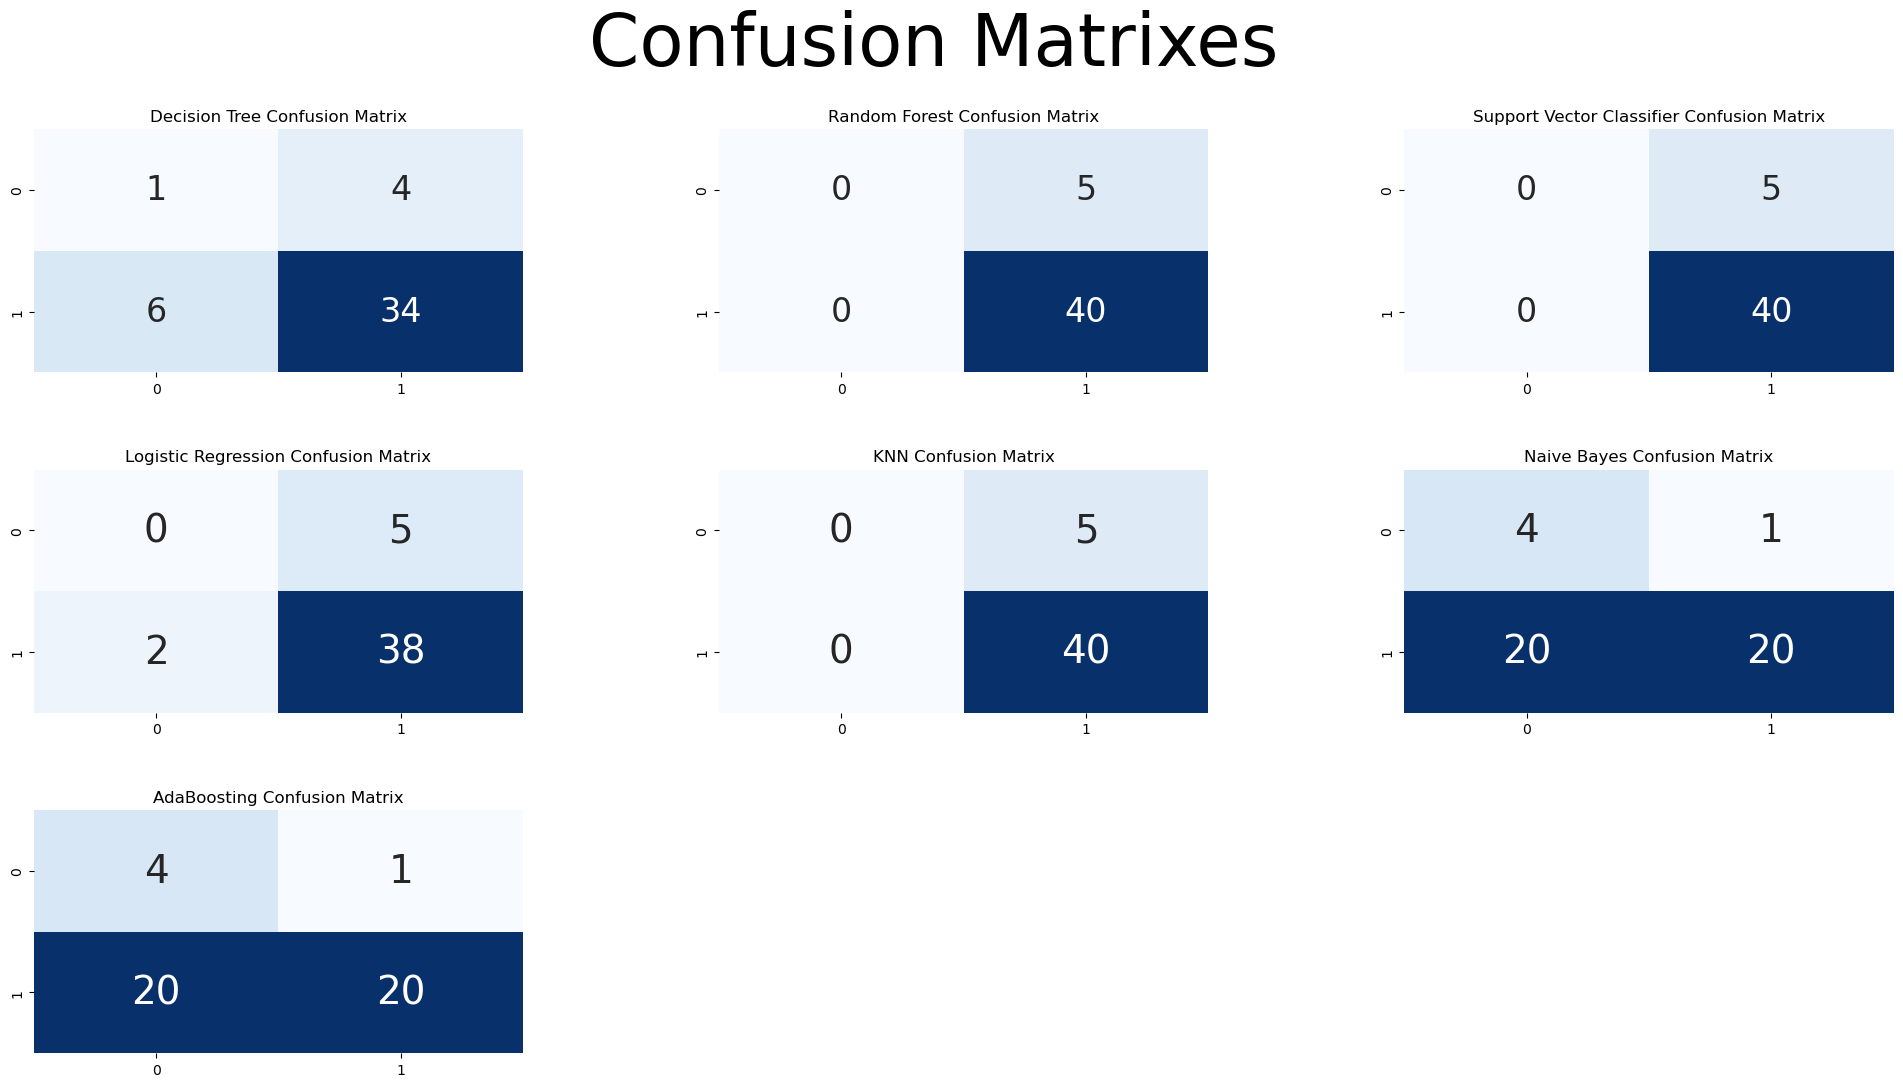

In [12]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=52)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Classifier Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 28})

plt.subplot(3,3,5)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 28})
plt.subplot(3,3,6)

plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 28})
plt.subplot(3,3,7)
plt.title("AdaBoosting Confusion Matrix")
sns.heatmap(cm7,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 28})
plt.show()

In [13]:
accuracy = pd.DataFrame()
accuracy["Models"] = model
accuracy["Accuracy"] = accur

<AxesSubplot: ylabel='Models'>

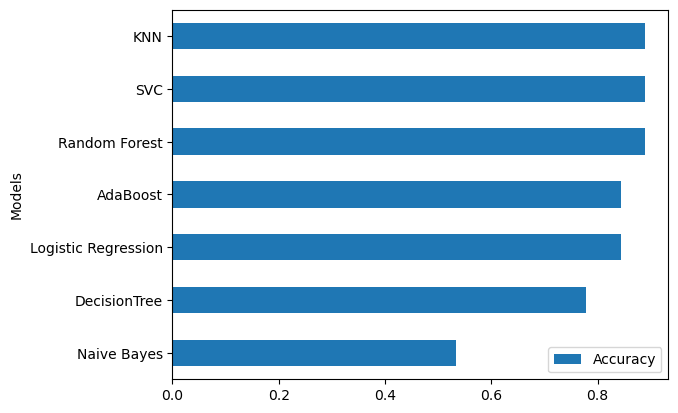

In [14]:
accuracy.sort_values(by="Accuracy").plot(kind="barh",x="Models",y="Accuracy")

In [15]:
accuracy

,Models,Accuracy
0,DecisionTree,0.777778
1,Random Forest,0.888889
2,SVC,0.888889
3,Logistic Regression,0.844444
4,KNN,0.888889
5,Naive Bayes,0.533333
6,AdaBoost,0.844444


In [16]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

models = list()

rf = Pipeline([('m',  RandomForestClassifier(random_state=8,n_estimators=100) )])
models.append(('rf', rf))

adaboost = Pipeline([('m', AdaBoostClassifier(n_estimators=100,learning_rate=1.6,random_state=8))])
models.append(('adaboost', adaboost))

ensemble = StackingClassifier(estimators=models,final_estimator=KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2 ) )

In [17]:
models

[('rf', Pipeline(steps=[('m', RandomForestClassifier(random_state=8))])),
 ('adaboost',
  Pipeline(steps=[('m',
                   AdaBoostClassifier(learning_rate=1.6, n_estimators=100,
                                      random_state=8))]))]

In [18]:
ensemble

StackingClassifier(estimators=[('rf',
                                Pipeline(steps=[('m',
                                                 RandomForestClassifier(random_state=8))])),
                               ('adaboost',
                                Pipeline(steps=[('m',
                                                 AdaBoostClassifier(learning_rate=1.6,
                                                                    n_estimators=100,
                                                                    random_state=8))]))],
                   final_estimator=KNeighborsClassifier(n_neighbors=8))

In [19]:
ensemble_model = ensemble.fit(X_train,Y_train)
ypred = ensemble_model.predict(X_test)

In [20]:
print(f"The accuracy of the Custom Ensemble model is that {accuracy_score(Y_test,ypred)}")


The accuracy of the Custom Ensemble model is that 0.9111111111111111


In [21]:
confusion_matrix(Y_test,ypred)

array([[ 1,  4],
       [ 0, 40]], dtype=int64)

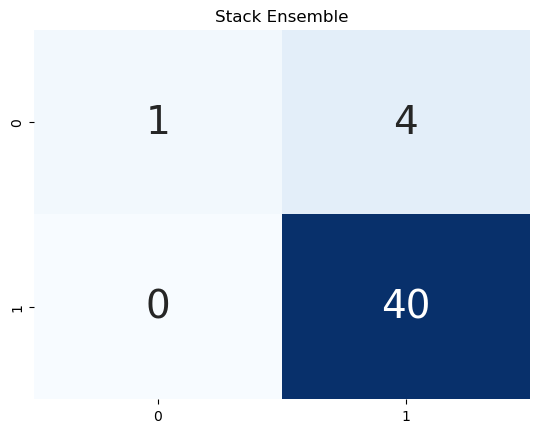

In [22]:
sns.heatmap(confusion_matrix(Y_test,ypred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 28})
plt.title("Stack Ensemble")
plt.show()

In [23]:
accuracy.loc[len(accuracy)] = ["Stack Ensemble",accuracy_score(Y_test,ypred)]

<AxesSubplot: ylabel='Models'>

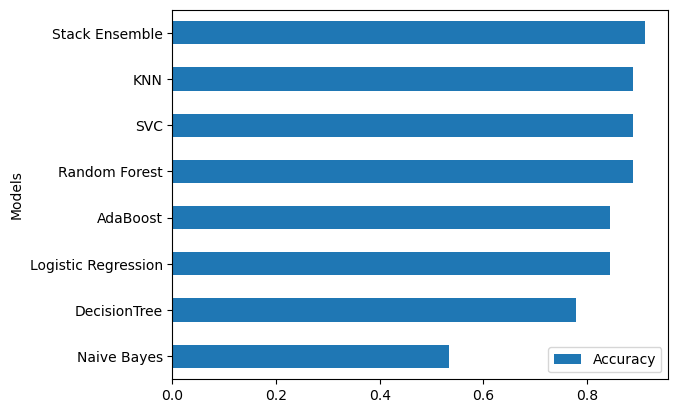

In [24]:
accuracy.sort_values(by="Accuracy").plot(kind="barh",x="Models",y="Accuracy")

In [25]:
accuracy

,Models,Accuracy
0,DecisionTree,0.777778
1,Random Forest,0.888889
2,SVC,0.888889
3,Logistic Regression,0.844444
4,KNN,0.888889
5,Naive Bayes,0.533333
6,AdaBoost,0.844444
7,Stack Ensemble,0.911111
